In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as mpl

In [2]:
df = pd.read_csv('task19.csv', encoding="windows-1251", sep=";")

In [3]:
df.head()

,Дата,Пункт отправления,Пункт назначения,Расстояние,Расход бензина,Масса груза
0,1 октября,Липки,Березки,432,63,770
1,1 октября,Орехово,Дубки,121,17,670
2,1 октября,Осинки,Вязово,333,47,830
3,1 октября,Липки,Вязово,384,54,730
4,1 октября,Березки,Буково,135,19,540


In [4]:
fuel_labels = df['Дата'].unique()

In [5]:
fuel_labels

array(['1 октября', '2 октября', '3 октября', '4 октября', '5 октября',
       '6 октября', '7 октября', '8 октября', '9 октября'], dtype=object)

In [6]:
fuel_data = df.groupby(['Дата']).sum()['Расход бензина']
fuel_data

Дата
1 октября     979
2 октября    1641
3 октября    1407
4 октября    1503
5 октября    1422
6 октября    1376
7 октября    1420
8 октября    1145
9 октября    1730
Name: Расход бензина, dtype: int64

In [15]:
fuel_colors = sns.color_palette('crest')[0:9]

([<matplotlib.patches.Wedge at 0x24b0d0187f0>,
 [Text(1.0675097497445698, 0.2653731979689852, '1 октября'),
  Text(0.6874581626080926, 0.858720719828924, '2 октября'),
  Text(-0.09174185961353616, 1.0961676109038483, '3 октября'),
  Text(-0.7949959488418171, 0.7602509068229376, '4 октября'),
  Text(-1.0993227778517012, 0.038593135353577813, '5 октября'),
  Text(-0.8681342078786425, -0.6755316403477503, '6 октября'),
  Text(-0.23324421761770747, -1.0749870394325243, '7 октября'),
  Text(0.4532632749115189, -1.002273617140791, '8 октября'),
  Text(0.9996054997536583, -0.459117463033415, '9 октября')],
 [Text(0.5822780453152199, 0.1447490170739919, '8%'),
  Text(0.3749771796044141, 0.46839311990668575, '13%'),
  Text(-0.05004101433465608, 0.5979096059475535, '11%'),
  Text(-0.4336341539137184, 0.4146823128125114, '12%'),
  Text(-0.5996306061009278, 0.021050801101951535, '11%'),
  Text(-0.47352774975198675, -0.36847180382604555, '11%'),
  Text(-0.12722411870056768, -0.586356566963195, '11%

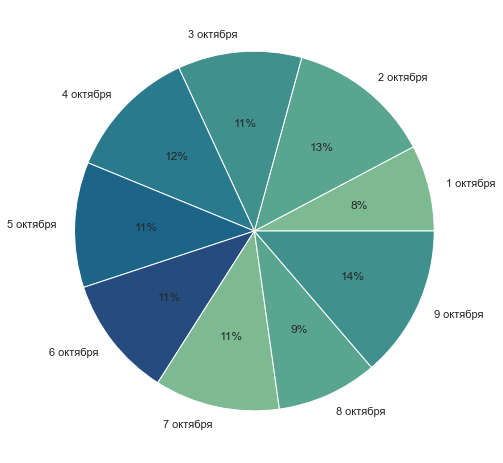

In [44]:
# суммарный расход бензина по датам по всем направлениям
plt.pie(fuel_data, labels=fuel_labels, colors=fuel_colors, autopct='%.0f%%')

<AxesSubplot:xlabel='Count', ylabel='Дата'>

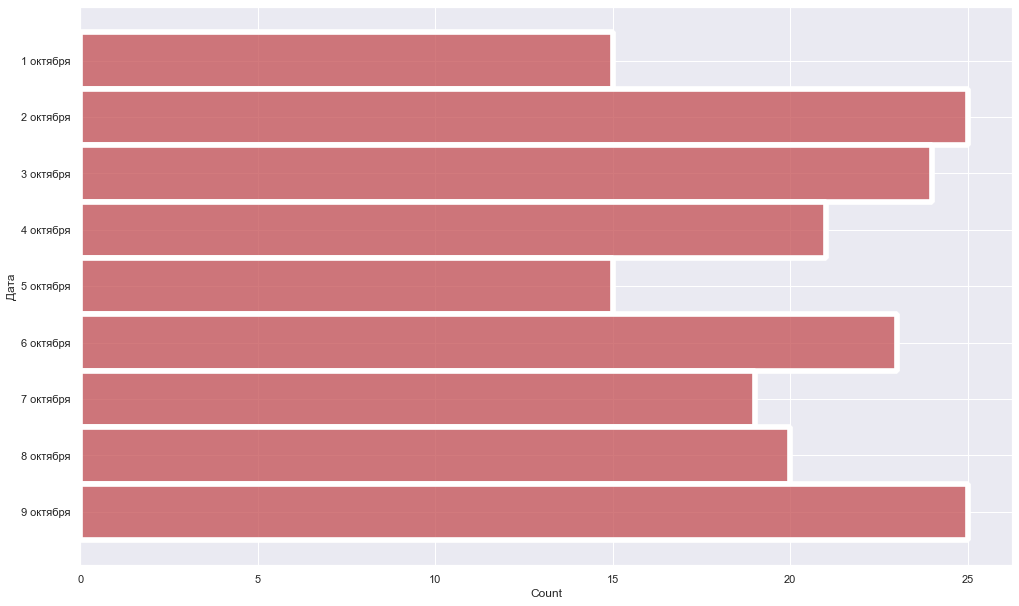

In [41]:
# Количество раз, когда масса груза была больше средней по выборке (по дням)
sns.set(rc={'figure.figsize':(16.7, 10.27)})
sns.histplot(data=df[df['Масса груза'] > df['Масса груза'].mean()], y='Дата', color="r")

In [46]:
df['Пункт отправления'].unique()
travel_amount = df.groupby(['Дата']).mean()['Расстояние']
travel_amount

Дата
1 октября    252.666667
2 октября    243.553191
3 октября    237.186047
4 октября    246.466667
5 октября    259.105263
6 октября    240.170732
7 октября    262.487179
8 октября    213.421053
9 октября    235.326923
Name: Расстояние, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1 октября'),
  Text(1, 0, '2 октября'),
  Text(2, 0, '3 октября'),
  Text(3, 0, '4 октября'),
  Text(4, 0, '5 октября'),
  Text(5, 0, '6 октября'),
  Text(6, 0, '7 октября'),
  Text(7, 0, '8 октября'),
  Text(8, 0, '9 октября')])

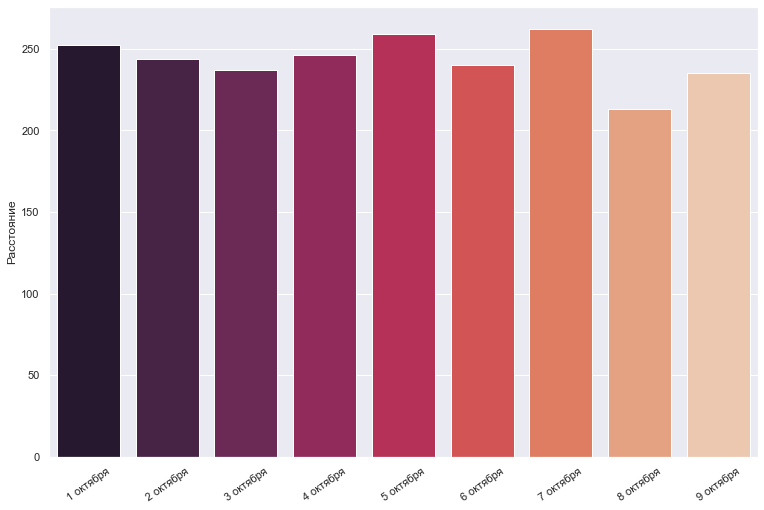

In [48]:
# Столбчатая диаграмма, показывающая изменение среднего расстояния поездок по дням
sns.set(rc={'figure.figsize':(12.7, 8.27)})
sns.barplot(x=df['Дата'].unique(), y=travel_amount, palette="rocket")
plt.xticks(rotation=35)